<a href="https://colab.research.google.com/github/ATANYIOBI/CGPA-CALCULATOR/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Predictions ML

In [78]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [79]:
# reading the dataset from the drive
df = pd.read_csv('/content/Housing.csv')

# viewing the first 10 records
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [80]:
# transforming the text columns into appropriate format for EDA

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
    elif df[col].dtype == 'object':
        df[col] = pd.factorize(df[col])[0]


In [81]:
# viewing the transformed data
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,0,1,0,1,2,1,2
541,1767150,2400,3,1,1,1,0,0,0,1,0,1,1
542,1750000,3620,2,1,1,0,0,0,0,1,0,1,2
543,1750000,2910,3,1,1,1,0,0,0,1,0,1,0


In [82]:
# finding the missing value
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [83]:
# basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [84]:
# staistical summary of the data
df.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.141284,0.177982,0.350459,0.045872,0.684404,0.693578,0.765138,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


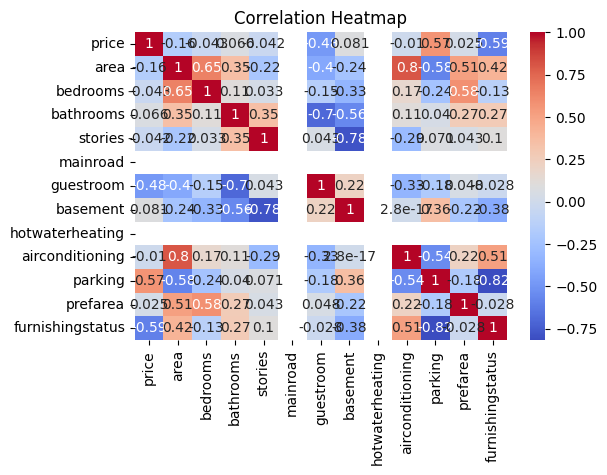

In [85]:
# plotting a heatmap graph
plt.figure(figsize=(6, 4))
sns.heatmap(df.head(10).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Exploratoey Data Analysis (EDA)

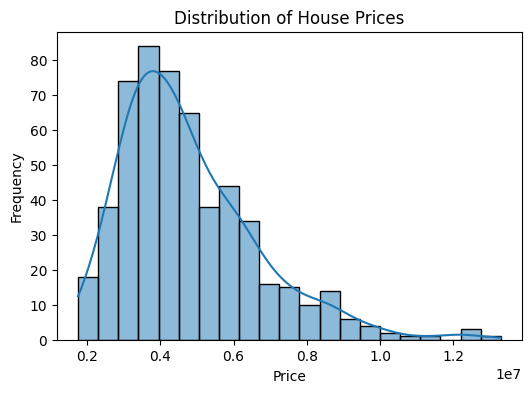

In [86]:
# Plotting a histplot for the 'price' column
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)  # Include a Kernel Density Estimate (kde)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


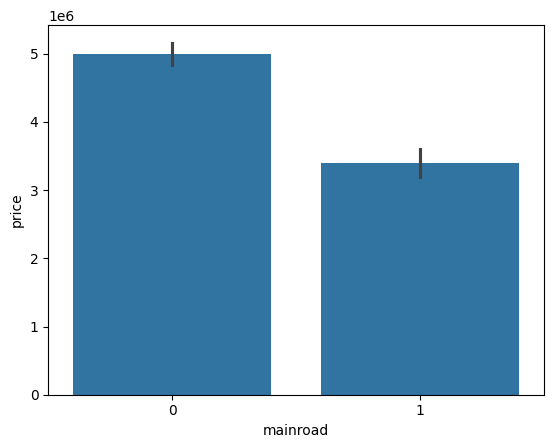

In [87]:
#  plotting a barplot for proximity of the house to the mainroad and non-proximity
sns.barplot(x='mainroad', y='price', data=df)
plt.show()

In [88]:
# separate the data into independent and target variable

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']


In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# prompt: next step

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)



RandomForestRegressor()

In [91]:
# Make predictions
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)



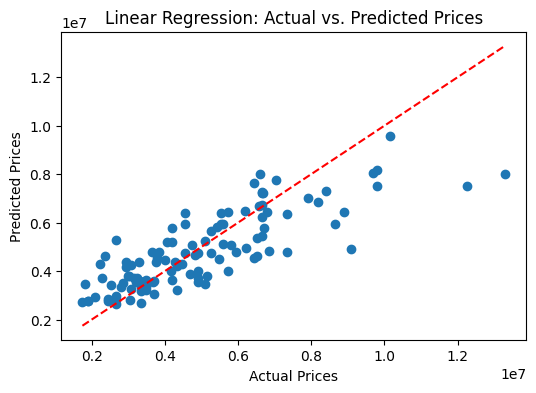

In [92]:
# Plot the linear regression model predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, linear_pred)  # Scatter plot of actual vs. predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Diagonal line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs. Predicted Prices")
plt.show()


In [98]:
# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
# Print the evaluation metrics
print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}")

print("\nDecision Tree Regression:")
print(f"Mean Squared Error: {tree_mse}")
print(f"R-squared: {tree_r2}")

print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {forest_mse}")
print(f"R-squared: {forest_r2}")



Linear Regression:
Mean Squared Error: 1771751116594.0408
R-squared: 0.6494754192267793

Decision Tree Regression:
Mean Squared Error: 2950082311926.6055
R-squared: 0.41635348444286946

Random Forest Regression:
Mean Squared Error: 1934844171314.0332
R-squared: 0.6172089659437427


# Predicting Price of New house with new features

In [94]:
# from the forest_model

def predict_new_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    # Create a numpy array with the new house features
    new_house = np.array([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]])

    # Scale the new house features using the same scaler used for training
    new_house_scaled = scaler.transform(new_house)

    # Predict the price using the trained Random Forest model
    predicted_price = forest_model.predict(new_house_scaled)

    return predicted_price[0]


In [97]:
# setting the feature with new values
area = 100 # area of the house
bedrooms = 4 # number of bedrooms
bathrooms = 2 # number of bathrooms
stories = 1  # number of stories
mainroad = 1 # 1 means the house is close to the main road and 0 means not close
guestroom = 1 # 1 means there is guessroom and 0 no guessroom
basement = 1 # 1 there is basement and 0 no basement
hotwaterheating = 1 #1 there is hotwaterheating and 0 not
airconditioning = 1 # 1 there is airconditioning and 0 not
parking = 2 #number of cars parking space
prefarea = 0 # 1 means the house ia located at a preferred area and 0 means not preferred area
furnishingstatus = 2 # 0 means furnished, 1 semi-furnished, 2 not furnished


predicted_price = predict_new_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus)
print(f"Predicted price for the new house: {predicted_price}")


Predicted price for the new house: 5222840.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
